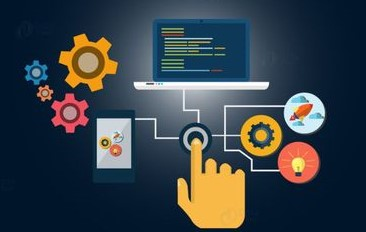



---


# <font color='LightSteelBlue'>**Pre-Processing**</font>


---



## <font color='MediumPurple'>Importing Packages </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 

## <font color='MediumPurple'>**Our Data about changing weather in Saudi Arabia**</font>

<font color='Peru'>The Kingdom of Saudi Arabia has started the process of Cloud seeding recently
in early April 2022 , the Kingdom began the first phase of a cloud-seeding program
The goal behind this is to increase the rate of rain seeding and improve the Kingdom's climate
Note that the Kingdom is one of the driest countries in the world, and does not contain permanent of water such as rivers 
So in the next few years the weather in the kingdom will be nice and full of clouds</font>

## <font color='MediumPurple'>Loading Dataset and initial exploration first 5 rows</font>


In [ ]:
df = pd.read_csv('Weather_dataset.csv')

In [ ]:
df.shape

(9079, 36)

In [ ]:
subdf = df.sample(n=300000) # the total number of data 2000000 and will take 300000 as number of sample

In [ ]:
subdf.shape

(300000, 36)

In [ ]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 169925 to 301942
Data columns (total 36 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      300000 non-null  int64  
 1   STATION_ID                              300000 non-null  int64  
 2   STATION_NAME                            300000 non-null  object 
 3   STATION_COUNTRY                         300000 non-null  object 
 4   OBSERVATION_DATE                        300000 non-null  object 
 5   SOURCE_ID                               300000 non-null  int64  
 6   LATITUDE                                300000 non-null  float64
 7   LONGITUDE                               300000 non-null  float64
 8   ELEVATION                               300000 non-null  float64
 9   WIND_DIRECTION_ANGLE                    300000 non-null  float64
 10  WIND_DIRECTION_ANGLE_UNITS             

* <font color='LightSteelBlue'>**description the data for the  numerical coulmn**</font>

In [ ]:
subdf.describe()

,ID,STATION_ID,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,VISIBILITY_DISTANCE,AIR_TEMPERATURE,AIR_TEMPERATURE_DEW_POINT,ATMOSPHERIC_SEA_LEVEL_PRESSURE
count,3.000000e+05,3.000000e+05,300000.0,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,299999.000000
mean,4.633715e+06,4.061788e+10,4.0,24.669774,42.792548,617.436101,333.205217,23.663499,58344.699783,123810.314637,42.475082,34.630060,7129.676158
std,2.673856e+06,5.456041e+08,0.0,4.234173,3.971616,547.316409,312.135734,140.290256,40866.991996,315951.771957,127.765419,161.325472,4191.351878
min,3.700000e+01,4.034160e+10,4.0,16.900000,35.483333,0.000000,1.000000,0.000000,0.000000,0.000000,-45.000000,-49.000000,916.300000
25%,2.320035e+06,4.037710e+10,4.0,21.483418,39.705061,179.220000,120.000000,2.100000,22000.000000,9900.000000,19.000000,2.000000,1015.300000
50%,4.631249e+06,4.042010e+10,4.0,25.285306,42.656625,624.530000,260.000000,3.100000,22000.000000,9999.000000,26.000000,7.000000,9999.900000
75%,6.943361e+06,4.103010e+10,4.0,27.900917,46.125069,777.540000,340.000000,5.100000,99999.000000,11200.000000,32.900000,14.000000,9999.900000
max,9.270695e+06,6.923350e+10,4.0,31.692683,54.050000,2090.310000,999.000000,999.900000,99999.000000,999999.000000,999.900000,999.900000,9999.900000


* <font color='Peru'>**return a description about categrecal columns**</font>

In [ ]:
subdf.describe(exclude='number')

,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,WIND_DIRECTION_ANGLE_UNITS,WIND_DIRECTION_QUALITY,WIND_TYPE,WIND_SPEED_RATE_UNITS,WIND_SPEED_QUALITY,SKY_CEILING_HEIGHT_UNITS,SKY_CEILING_QUALITY,...,VISIBILITY_DISTANCE_QUALITY,VISIBILITY_VARIABILITY,VISIBILITY_VARIABILITY_QUALITY,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000,300000,300000,300000,300000,300000,300000,299999,299999,299999
unique,73,1,209612,1,4,4,1,4,1,3,...,3,3,2,1,4,1,6,1,4,1534
top,KING ABDULAZIZ AB,SA,2016-03-14 15:00:00,ANGULAR DEGREES,Passed all quality control checks,Normal,METERS PER SECOND,Passed all quality control checks,METERS,Passed all quality control checks,...,Passed all quality control checks,Not variable,Passed all quality control checks,DEGREES CELSIUS,Passed all quality control checks,DEGREES CELSIUS,Passed all quality control checks,HECTOPASCALS,Passed gross limits check if element is present,2019-05-26 16:20:21.563000
freq,17546,300000,8,300000,269751,250510,300000,293885,300000,208260,...,265460,241591,215467,300000,294423,300000,290455,299999,204227,417


In [ ]:
# Get the number of missing values per column
subdf.isna().sum()

ID                                        0
STATION_ID                                0
STATION_NAME                              0
STATION_COUNTRY                           0
OBSERVATION_DATE                          0
SOURCE_ID                                 0
LATITUDE                                  0
LONGITUDE                                 0
ELEVATION                                 0
WIND_DIRECTION_ANGLE                      0
WIND_DIRECTION_ANGLE_UNITS                0
WIND_DIRECTION_QUALITY                    0
WIND_TYPE                                 0
WIND_SPEED_RATE                           0
WIND_SPEED_RATE_UNITS                     0
WIND_SPEED_QUALITY                        0
SKY_CEILING_HEIGHT                        0
SKY_CEILING_HEIGHT_UNITS                  0
SKY_CEILING_QUALITY                       0
SKY_CEILING_DETERMINATION                 0
SKY_CAVOK                                 0
VISIBILITY_DISTANCE                       0
VISIBILITY_DISTANCE_UNITS       

In [ ]:
# Number of Unique values in each columns.
subdf.nunique()

ID                                        300000
STATION_ID                                    76
STATION_NAME                                  73
STATION_COUNTRY                                1
OBSERVATION_DATE                          209612
SOURCE_ID                                      1
LATITUDE                                      72
LONGITUDE                                     74
ELEVATION                                     72
WIND_DIRECTION_ANGLE                         136
WIND_DIRECTION_ANGLE_UNITS                     1
WIND_DIRECTION_QUALITY                         4
WIND_TYPE                                      4
WIND_SPEED_RATE                              113
WIND_SPEED_RATE_UNITS                          1
WIND_SPEED_QUALITY                             4
SKY_CEILING_HEIGHT                           128
SKY_CEILING_HEIGHT_UNITS                       1
SKY_CEILING_QUALITY                            3
SKY_CEILING_DETERMINATION                      7
SKY_CAVOK           

* <font color='LightSteelBlue'>**Exploring all the values in each column/feature**</font>

In [ ]:
for features in subdf.columns[1:]:
    print(subdf[features].value_counts())
    print("\n")

40416099999    17546
40430099999    13137
40375099999    11559
40373099999    11522
40400099999    11353
               ...  
40438499999       11
40368099999        2
40371099999        1
40418099999        1
40390099999        1
Name: STATION_ID, Length: 76, dtype: int64


KING ABDULAZIZ AB                17546
PRINCE MOHAMMAD BIN ABDULAZIZ    13137
TABUK                            11559
QAISUMAH                         11522
WEJH                             11353
                                 ...  
OBAYLAH                             19
TAWQAH                               2
TOBAGE                               1
AL-QATIF-GOSP-3                      1
BAG'A                                1
Name: STATION_NAME, Length: 73, dtype: int64


SA    300000
Name: STATION_COUNTRY, dtype: int64


2016-03-14 15:00:00    8
2015-02-08 12:00:00    8
2018-09-06 21:00:00    8
2000-04-26 09:00:00    8
2018-12-03 15:00:00    8
                      ..
1990-04-14 07:22:00    1
1991-10-31 21:00:00   

## <font color='MediumPurple'>Drop Outliers</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

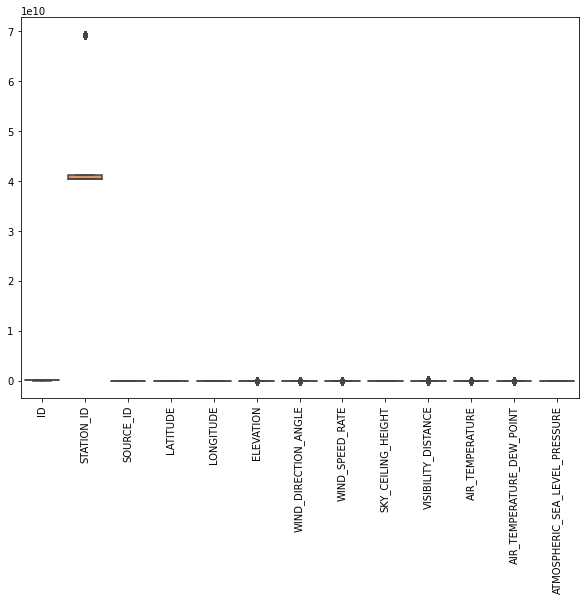

In [ ]:
# outlire in dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=subdf)
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9efded0ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9efded3990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9efded08d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9efdefe490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9efdefe9d0>],
 'means': []}

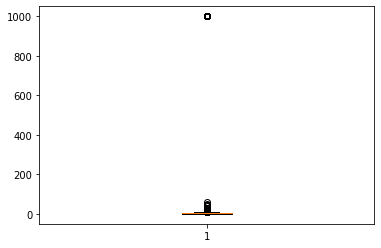

In [ ]:
plt.boxplot(subdf.WIND_SPEED_RATE)

* <font color='LightSteelBlue'>**The normal record for the wind speed are less than 10 mile per hour 
and the highst record was 200 mile per hour and that happen in 1934 
so more than that are not corrict as you can see
there is a record tells there was wind speed equal 1000 mile per houre 
so we fix it be deleting this record to have normal rang**</font>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9efcf62dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9efcf5a890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9efcf627d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9efcf59390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9efcf598d0>],
 'means': []}

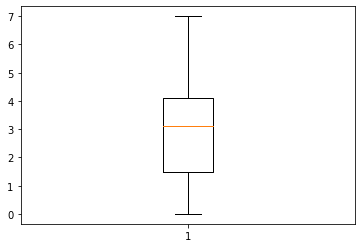

In [ ]:
subdf = subdf[subdf.WIND_SPEED_RATE <= 7]
plt.boxplot(subdf.WIND_SPEED_RATE)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9efe087bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9efe07b690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9efe0875d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9efe081190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9efe0816d0>],
 'means': []}

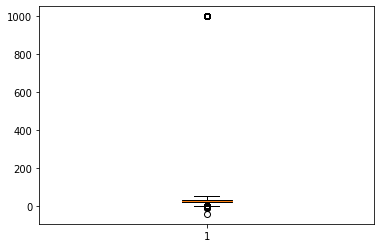

In [ ]:
plt.boxplot(subdf.AIR_TEMPERATURE)

 * <font color='Peru'>**it impossipal to have a tempreture more than 55 
so we also delet this record
    And there is some outlaire above 45 and less than 10**</font> 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9efb245b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9efb242590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9efb245510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9efb249090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9efb2495d0>],
 'means': []}

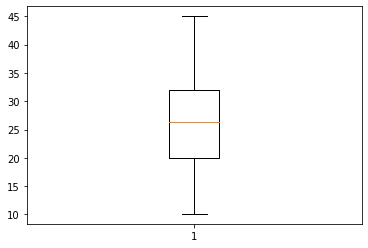

In [ ]:
# outlaier 
subdf = subdf[subdf.AIR_TEMPERATURE <= 45 ]
subdf = subdf[subdf.AIR_TEMPERATURE >10 ]
plt.boxplot(subdf.AIR_TEMPERATURE)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9efb59ce10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9efb5978d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9efb59c810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9efd1c93d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9efd1c9910>],
 'means': []}

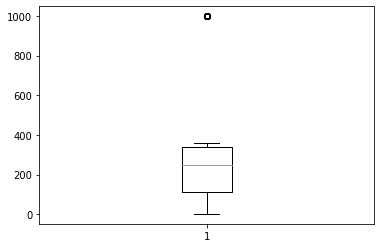

In [ ]:
plt.boxplot(subdf.WIND_DIRECTION_ANGLE)

* <font color='LightSteelBlue'>**there is 360 degree 
more than that not correct**</font>


In [ ]:
subdf = subdf[subdf.WIND_DIRECTION_ANGLE <= 360 ]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9efe1b3750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9efe19f210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9efe1b3150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9efe19fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9efe1c6250>],
 'means': []}

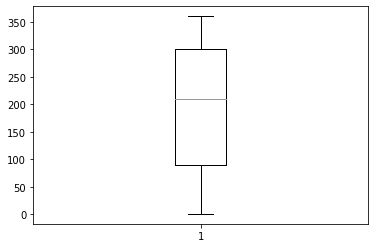

In [ ]:
plt.boxplot(subdf.WIND_DIRECTION_ANGLE)

### <font color='MediumPurple'>**Missing/duplicate Value**</font> 

* <font color='CornflowerBlue'>**Drop Missing record in cavok (Clouds And Visibility OK)**</font>

In [ ]:
subdf.groupby('SKY_CAVOK').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
SKY_CAVOK,,,,,,,,,,,,,,,,,,,,,
Missing,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242
No,120017,120017,120017,120017,120017,120017,120017,120017,120017,120017,...,120017,120017,120017,120017,120017,120017,120017,120017,120017,120017
Yes,84456,84456,84456,84456,84456,84456,84456,84456,84456,84456,...,84456,84456,84456,84456,84456,84456,84455,84455,84455,84455


In [ ]:
subdf = subdf[subdf.SKY_CAVOK != 'Missing']

In [ ]:
subdf.groupby('SKY_CAVOK').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
SKY_CAVOK,,,,,,,,,,,,,,,,,,,,,
No,120017,120017,120017,120017,120017,120017,120017,120017,120017,120017,...,120017,120017,120017,120017,120017,120017,120017,120017,120017,120017
Yes,84456,84456,84456,84456,84456,84456,84456,84456,84456,84456,...,84456,84456,84456,84456,84456,84456,84455,84455,84455,84455


* <font color='Peru'>**Drop Variable and Missing records**</font> 

In [ ]:
subdf.groupby('WIND_TYPE').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
WIND_TYPE,,,,,,,,,,,,,,,,,,,,,
Normal,204336,204336,204336,204336,204336,204336,204336,204336,204336,204336,...,204336,204336,204336,204336,204336,204336,204335,204335,204335,204335
Variable,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137


In [ ]:
subdf = subdf[subdf.WIND_TYPE != 'Variable']

In [ ]:
subdf = subdf[subdf.WIND_TYPE != 'Missing']

In [ ]:
subdf.groupby('WIND_TYPE').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
WIND_TYPE,,,,,,,,,,,,,,,,,,,,,
Normal,204336,204336,204336,204336,204336,204336,204336,204336,204336,204336,...,204336,204336,204336,204336,204336,204336,204335,204335,204335,204335


* <font color='Peru'>**Drop station_country column it all about Saudi Arabia (SA)**</font>

In [ ]:
subdf.groupby('STATION_COUNTRY').count()

,ID,STATION_ID,STATION_NAME,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_DIRECTION_ANGLE_UNITS,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
STATION_COUNTRY,,,,,,,,,,,,,,,,,,,,,
SA,204336,204336,204336,204336,204336,204336,204336,204336,204336,204336,...,204336,204336,204336,204336,204336,204336,204335,204335,204335,204335


In [ ]:
subdf = subdf.drop('STATION_COUNTRY', axis=1) # All SA

* <font color='CornflowerBlue'>**Drop visibility_variability all the record are missing**</font> 

In [ ]:
subdf.groupby('VISIBILITY_VARIABILITY').count()

,ID,STATION_ID,STATION_NAME,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_DIRECTION_ANGLE_UNITS,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
VISIBILITY_VARIABILITY,,,,,,,,,,,,,,,,,,,,,
Missing,42585,42585,42585,42585,42585,42585,42585,42585,42585,42585,...,42585,42585,42585,42585,42585,42585,42584,42584,42584,42584
Not variable,161751,161751,161751,161751,161751,161751,161751,161751,161751,161751,...,161751,161751,161751,161751,161751,161751,161751,161751,161751,161751


In [ ]:
subdf = subdf.drop('VISIBILITY_VARIABILITY', axis=1) # all with Missing value 

* <font color='CornflowerBlue'>**Drop unnecessary or redundant columns**</font> 

In [ ]:
subdf = subdf.drop('ID', axis=1)
subdf = subdf.drop('STATION_ID', axis=1)
subdf = subdf.drop('SOURCE_ID', axis=1)
subdf = subdf.drop('LATITUDE', axis=1)
subdf = subdf.drop('LONGITUDE', axis=1)
subdf = subdf.drop('WIND_DIRECTION_ANGLE_UNITS', axis=1)
subdf = subdf.drop('WIND_DIRECTION_QUALITY', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_DEW_POINT', axis=1)
subdf = subdf.drop('SKY_CEILING_QUALITY', axis=1)
subdf = subdf.drop('SKY_CEILING_HEIGHT_UNITS', axis=1)
subdf = subdf.drop('VISIBILITY_DISTANCE_QUALITY', axis=1)
subdf = subdf.drop('VISIBILITY_VARIABILITY_QUALITY', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_UNITS', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_QUALITY', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_DEW_POINT_UNITS', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_DEW_POINT_QUALITY', axis=1)
subdf = subdf.drop('ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS', axis=1)
subdf = subdf.drop('ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY', axis=1)
subdf = subdf.drop('LAST_LOAD_DATE', axis=1)
subdf = subdf.drop('VISIBILITY_DISTANCE_UNITS', axis=1)
subdf = subdf.drop('WIND_SPEED_RATE_UNITS', axis=1)
subdf = subdf.drop('SKY_CEILING_DETERMINATION', axis=1)
subdf = subdf.drop('WIND_SPEED_QUALITY', axis=1)
subdf = subdf.drop('ATMOSPHERIC_SEA_LEVEL_PRESSURE', axis=1)

* <font color='Peru'>**Parse Float to Int**</font>

In [ ]:
subdf['ELEVATION'] = subdf['ELEVATION'].astype('int')
subdf['WIND_SPEED_RATE'] = subdf['WIND_SPEED_RATE'].astype('int')
subdf['AIR_TEMPERATURE'] = subdf['AIR_TEMPERATURE'].astype('int')


In [ ]:
# Convert date to datetime object_ for look better in visualization
subdf["OBSERVATION_DATE"] = pd.to_datetime(subdf["OBSERVATION_DATE"])

In [ ]:
subdf.head(5)

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE
169925,36,116838,6,300.0,0,4,22000.0,0,10000.0,35
72692,56,33296,720,140.0,0,5,22000.0,0,8000.0,30
203229,65,121294,854,340.0,0,4,99999.0,1,10000.0,27
296106,21,100265,648,260.0,0,2,22000.0,0,10000.0,27
38707,50,14138,655,360.0,0,2,99999.0,1,9900.0,35


## <font color='MediumSlateBlue'>**Feature Engineering-Encoding**</font> 




* **<font color='CornflowerBlue'>In features with binary values do the transform to numbers  1 = yes else number = 0 as (SKY_CAVOK) there are two value yes, No.</font>**

* **<font color='CornflowerBlue'>For a categorical features will perform a one hot encoding.</font>**


In [ ]:
label_encoder = preprocessing.LabelEncoder()

subdf['STATION_NAME']= label_encoder.fit_transform(subdf['STATION_NAME'])
subdf['OBSERVATION_DATE']= label_encoder.fit_transform(subdf['OBSERVATION_DATE'])
subdf['WIND_TYPE']= label_encoder.fit_transform(subdf['WIND_TYPE'])
subdf['SKY_CAVOK']= label_encoder.fit_transform(subdf['SKY_CAVOK'])

In [ ]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204336 entries, 169925 to 232488
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   STATION_NAME          204336 non-null  int64  
 1   OBSERVATION_DATE      204336 non-null  int64  
 2   ELEVATION             204336 non-null  int64  
 3   WIND_DIRECTION_ANGLE  204336 non-null  float64
 4   WIND_TYPE             204336 non-null  int64  
 5   WIND_SPEED_RATE       204336 non-null  int64  
 6   SKY_CEILING_HEIGHT    204336 non-null  float64
 7   SKY_CAVOK             204336 non-null  int64  
 8   VISIBILITY_DISTANCE   204336 non-null  float64
 9   AIR_TEMPERATURE       204336 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 17.1 MB


In [ ]:
subdf.head()

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE
169925,36,116838,6,300.0,0,4,22000.0,0,10000.0,35,1001.2
72692,56,33296,720,140.0,0,5,22000.0,0,8000.0,30,9999.9
203229,65,121294,854,340.0,0,4,99999.0,1,10000.0,27,9999.9
296106,21,100265,648,260.0,0,2,22000.0,0,10000.0,27,1001.0
38707,50,14138,655,360.0,0,2,99999.0,1,9900.0,35,9999.9


In [ ]:
subdf.shape

(204336, 11)



---


# <font color='LightSteelBlue'>**Pre-Processing For Second Dataset**</font>


---



## <font color='MediumPurple'>**This Data about plant according the weather in Saudi Arabia**</font>

<font color='Peru'></font>

## <font color='MediumPurple'>Importing Packages </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 

## <font color='Peru'>Loading Dataset and start exploration </font>


## load data from CSV file

In [ ]:
plantsdf = pd.read_csv('All_data_with_climate.csv') 

In [ ]:
plantsdf.head()

,Unnamed: 0,Data.ID,Location,Level,Nation.code,State.code,County.code,Crop,Qualifier,Crop.name.in.original.data,...,LGP.P.tmin5.tmax100,temp.growing.season,precip.growing.season,ndays.since.snowfrac_0.5,ndays.since.snowfrac_0.1,ndays.since.snowfrac_0.05,ndays.since.snowfrac_0,climate.category,misclassified,climate.category.string
0,1,1,Albania,N,55,NaN,NaN,Wheat,Winter,Wheat,...,252.0,8.908445,113.915234,276.0,219.0,-152.0,-160.0,1.0,True,1X
1,2,2,Albania,N,55,NaN,NaN,Maize,NaN,Maize,...,259.0,19.659421,53.091993,94.0,37.0,31.0,23.0,1.0,False,1
2,3,4,Albania,N,55,NaN,NaN,Pulses,NaN,Beans,...,253.0,20.111578,45.102474,99.0,42.0,36.0,28.0,1.0,False,1
3,4,5,Albania,N,55,NaN,NaN,Other,Winter vegetables,Winter vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,5,6,Albania,N,55,NaN,NaN,Other,Spring field vegetables,Spring vegetables (field planting),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [ ]:
plantsdf.shape

(1510, 96)

In [ ]:
plantsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 96 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1510 non-null   int64  
 1   Data.ID                                1510 non-null   int64  
 2   Location                               1510 non-null   object 
 3   Level                                  1510 non-null   object 
 4   Nation.code                            1510 non-null   int64  
 5   State.code                             805 non-null    float64
 6   County.code                            248 non-null    float64
 7   Crop                                   1510 non-null   object 
 8   Qualifier                              517 non-null    object 
 9   Crop.name.in.original.data             1510 non-null   object 
 10  Plant.start                            1510 non-null   int64  
 11  Plan

## <font color='LightSteelBlue'>**Plants with temp**</font> 

* <font color='LightSteelBlue'>**we need just 4 column from this dataset to reach to our goal which is predict plants according to the temperature of weather .**</font>
* <font color='LightSteelBlue'>**and we will delete other columns in the data that's unssely for goal**</font>

In [ ]:
plantsdf.drop(plantsdf.columns.difference(['Crop','Crop.name.in.original.data','temp.average','temp.min','temp.max']), 1, inplace=True)

In [ ]:
plantsdf.head()

,Crop,Crop.name.in.original.data,temp.average,temp.min,temp.max
0,Wheat,Wheat,13.298533,4.623191,22.225507
1,Maize,Maize,12.599007,3.682332,21.646772
2,Pulses,Beans,13.016876,4.271594,21.983251
3,Other,Winter vegetables,NaN,NaN,NaN
4,Other,Spring vegetables (field planting),NaN,NaN,NaN


In [ ]:
# Number of missing values in the data
plantsdf.isnull().sum()

Crop                            0
Crop.name.in.original.data      0
temp.average                  235
temp.min                      235
temp.max                      235
dtype: int64

In [ ]:
plantsdf['Crop'].dropna()

0            Wheat
1            Maize
2           Pulses
3            Other
4            Other
           ...    
1505        Cotton
1506    Groundnuts
1507     Sunflower
1508       Sorghum
1509       Sorghum
Name: Crop, Length: 1510, dtype: object

In [ ]:
plantsdf['temp.average'].fillna((plantsdf['temp.average'].mean()), inplace=True)

In [ ]:
plantsdf['temp.max'].fillna((plantsdf['temp.max'].mean()), inplace=True)

In [ ]:
plantsdf['temp.min'].fillna((plantsdf['temp.min'].mean()), inplace=True)

In [ ]:
# Number of missing values in the data
plantsdf.isnull().sum()

Crop                          0
Crop.name.in.original.data    0
temp.average                  0
temp.min                      0
temp.max                      0
dtype: int64



---


for i in plantsdf:

 if plantsdf['Crop'][i] == 'Other':

  plantsdf['Crop'][i] = plantsdf['Crop.name.in.original.data'][i]


---



plantsdf['Crop'][3] = plantsdf['Crop.name.in.original.data'][3]

---



In [ ]:
plantsdf = plantsdf.drop(['Crop'], axis=1)

In [ ]:
plantsdf['AIR_TEMPERATURE'] = plantsdf['temp.average']

In [ ]:
plantsdf['TEMP_MAX'] = plantsdf['temp.max']

In [ ]:
plantsdf['TEMP_MIN'] = plantsdf['temp.min']

In [ ]:
plantsdf = plantsdf.drop(['temp.average','temp.min','temp.max'], axis=1)

In [ ]:
plantsdf.head()

,Crop.name.in.original.data,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN
0,Wheat,13.298533,22.225507,4.623191
1,Maize,12.599007,21.646772,3.682332
2,Beans,13.016876,21.983251,4.271594
3,Winter vegetables,17.946600,25.393218,9.888232
4,Spring vegetables (field planting),17.946600,25.393218,9.888232


In [ ]:
plantsdf.rename(columns = {'Crop.name.in.original.data':'Crop'}, inplace = True)

In [ ]:
plantsdf.head()

,Crop,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN
0,Wheat,13.298533,22.225507,4.623191
1,Maize,12.599007,21.646772,3.682332
2,Beans,13.016876,21.983251,4.271594
3,Winter vegetables,17.946600,25.393218,9.888232
4,Spring vegetables (field planting),17.946600,25.393218,9.888232


## <font color='LightSteelBlue'>**Join plants with our dataset**</font> 

* <font color='LightSteelBlue'>**Now we want to Join this data of plants and temperature with the data for forecasting the weather.**</font>

In [ ]:
subdf.head()

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE
169925,36,116838,6,300.0,0,4,22000.0,0,10000.0,35
72692,56,33296,720,140.0,0,5,22000.0,0,8000.0,30
203229,65,121294,854,340.0,0,4,99999.0,1,10000.0,27
296106,21,100265,648,260.0,0,2,22000.0,0,10000.0,27
38707,50,14138,655,360.0,0,2,99999.0,1,9900.0,35


In [ ]:
plantsdf.head()

,Crop,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN
0,Wheat,13.298533,22.225507,4.623191
1,Maize,12.599007,21.646772,3.682332
2,Beans,13.016876,21.983251,4.271594
3,Winter vegetables,17.946600,25.393218,9.888232
4,Spring vegetables (field planting),17.946600,25.393218,9.888232


In [ ]:
plantsdf['AIR_TEMPERATURE'] = plantsdf['AIR_TEMPERATURE'].astype('int')
plantsdf['TEMP_MAX'] = plantsdf['TEMP_MAX'].astype('int')
plantsdf['TEMP_MIN'] = plantsdf['TEMP_MIN'].astype('int')


In [ ]:
dt_join =pd.merge(subdf, plantsdf, how='left'
               , left_on = 'AIR_TEMPERATURE'
               ,right_on = 'AIR_TEMPERATURE')

In [ ]:
# check out the null value
dt_join.isnull().sum()

STATION_NAME                0
OBSERVATION_DATE            0
ELEVATION                   0
WIND_DIRECTION_ANGLE        0
WIND_TYPE                   0
WIND_SPEED_RATE             0
SKY_CEILING_HEIGHT          0
SKY_CAVOK                   0
VISIBILITY_DISTANCE         0
AIR_TEMPERATURE             0
Crop                    77978
TEMP_MAX                77978
TEMP_MIN                77978
dtype: int64

In [ ]:
# spilt the data 
d = dt_join[dt_join['AIR_TEMPERATURE']>=32] #18k
r = dt_join[dt_join['AIR_TEMPERATURE']<32] # 1642815

In [ ]:
d['Crop']='Palm'
d['TEMP_MIN'] = 32
d['TEMP_MAX'] = 50

In [ ]:
df_all = pd.concat([d, r])

In [ ]:
# Number of Unique values in each columns.
df_all.nunique()

STATION_NAME                71
OBSERVATION_DATE        156305
ELEVATION                   67
WIND_DIRECTION_ANGLE        71
WIND_TYPE                    1
WIND_SPEED_RATE              8
SKY_CEILING_HEIGHT         109
SKY_CAVOK                    2
VISIBILITY_DISTANCE        117
AIR_TEMPERATURE             36
Crop                       254
TEMP_MAX                    23
TEMP_MIN                    32
dtype: int64

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8178924 entries, 0 to 8178923
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STATION_NAME          int64  
 1   OBSERVATION_DATE      int64  
 2   ELEVATION             int64  
 3   WIND_DIRECTION_ANGLE  float64
 4   WIND_TYPE             int64  
 5   WIND_SPEED_RATE       int64  
 6   SKY_CEILING_HEIGHT    float64
 7   SKY_CAVOK             int64  
 8   VISIBILITY_DISTANCE   float64
 9   AIR_TEMPERATURE       int64  
 10  Crop                  object 
 11  TEMP_MAX              float64
 12  TEMP_MIN              float64
dtypes: float64(5), int64(7), object(1)
memory usage: 873.6+ MB


In [ ]:
# Number of Unique values in the column.
df_all['Crop'].nunique()

254

In [ ]:
df_all['Crop'] = df_all['Crop'].fillna(df_all['Crop'].mode()[0])

In [ ]:
df_all['TEMP_MIN'] = df_all['TEMP_MIN'].fillna(df_all['TEMP_MIN'].mode()[0])

In [ ]:
df_all['TEMP_MAX'] = df_all['TEMP_MAX'].fillna(df_all['TEMP_MAX'].mode()[0])

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8178924 entries, 0 to 8178923
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STATION_NAME          int64  
 1   OBSERVATION_DATE      int64  
 2   ELEVATION             int64  
 3   WIND_DIRECTION_ANGLE  float64
 4   WIND_TYPE             int64  
 5   WIND_SPEED_RATE       int64  
 6   SKY_CEILING_HEIGHT    float64
 7   SKY_CAVOK             int64  
 8   VISIBILITY_DISTANCE   float64
 9   AIR_TEMPERATURE       int64  
 10  Crop                  object 
 11  TEMP_MAX              float64
 12  TEMP_MIN              float64
dtypes: float64(5), int64(7), object(1)
memory usage: 873.6+ MB


In [ ]:
# check out the null value
df_all.isnull().sum()

STATION_NAME            0
OBSERVATION_DATE        0
ELEVATION               0
WIND_DIRECTION_ANGLE    0
WIND_TYPE               0
WIND_SPEED_RATE         0
SKY_CEILING_HEIGHT      0
SKY_CAVOK               0
VISIBILITY_DISTANCE     0
AIR_TEMPERATURE         0
Crop                    0
TEMP_MAX                0
TEMP_MIN                0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_all['Crop_encoded'] = LabelEncoder().fit_transform(df_all['Crop'])
df_all[['Crop', 'Crop_encoded']] 

,Crop,Crop_encoded
0,Palm,127
166,Palm,127
435,Palm,127
477,Palm,127
511,Palm,127
...,...,...
8178919,Barley,8
8178920,Oats,114
8178921,Corn,38
8178922,Cotton,46


In [ ]:
encoder = LabelEncoder()
encoder.fit(df_all['Crop'])
encoder.classes_

array(['All Cereals (Belg)', 'Aman paddy/Kharif', 'Aman rice', 'Anise',
       'Aus rice', 'Bajra', 'Bajra (Kharif)', 'Bananas', 'Barley',
       'Barley (Meher)', 'Barley (long rains)', 'Barley (short rains)',
       'Barley (winter)', 'Barley - spring', 'Barley - winter', 'Bean',
       'Beans', 'Beans (Deyr)', 'Beans (Gu)', 'Beans (long rains)',
       'Beans (main)', 'Beans (second)', 'Beans (short rains)',
       'Beans (third)', 'Beans - dry', 'Birdseed', 'Boro paddy/Rabi',
       'Boro rice', 'Broom Millet', 'Buckwheat', 'Canola', 'Cassava',
       'Castor (Kharif)', 'Castor beans', 'Castorseed', 'Cereals',
       'Chickpeas', 'Cholam', 'Corn', 'Corn (1)', 'Corn (2)',
       'Corn (north - vuli rains)', 'Corn, Dry season',
       'Corn, first crop', 'Corn, rainy season', 'Corn, second crop',
       'Cotton', 'Cotton (Deyr)', 'Cotton (Gu)', 'Cotton (Hybrid)',
       'Cotton (Hybrid, irrigated)', 'Cotton (Kharif)', 'Cotton (coast)',
       'Cotton (east)', 'Cotton (lake)', 'Cotton

In [ ]:
df_all['Crop_encoded'] = encoder.transform(df_all['Crop']) # transform as a separate step from fit
df_all[['Crop', 'Crop_encoded']]

,Crop,Crop_encoded
0,Palm,127
166,Palm,127
435,Palm,127
477,Palm,127
511,Palm,127
...,...,...
8178919,Barley,8
8178920,Oats,114
8178921,Corn,38
8178922,Cotton,46


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8178924 entries, 0 to 8178923
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STATION_NAME          int64  
 1   OBSERVATION_DATE      int64  
 2   ELEVATION             int64  
 3   WIND_DIRECTION_ANGLE  float64
 4   WIND_TYPE             int64  
 5   WIND_SPEED_RATE       int64  
 6   SKY_CEILING_HEIGHT    float64
 7   SKY_CAVOK             int64  
 8   VISIBILITY_DISTANCE   float64
 9   AIR_TEMPERATURE       int64  
 10  Crop                  object 
 11  TEMP_MAX              float64
 12  TEMP_MIN              float64
 13  Crop_encoded          int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 936.0+ MB


In [ ]:
df_all.head()

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,Crop,TEMP_MAX,TEMP_MIN,Crop_encoded
0,36,116838,6,300.0,0,4,22000.0,0,10000.0,35,Palm,50.0,32.0,127
166,50,14138,655,360.0,0,2,99999.0,1,9900.0,35,Palm,50.0,32.0,127
435,67,50460,628,120.0,0,1,22000.0,0,10000.0,34,Palm,50.0,32.0,127
477,50,39706,655,30.0,0,2,99999.0,1,9900.0,36,Palm,50.0,32.0,127
511,25,85252,1015,360.0,0,3,22000.0,0,9900.0,39,Palm,50.0,32.0,127


In [ ]:
df_all = df_all.drop(['Crop'], axis=1)

In [ ]:
df_all.head(2)

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN,Crop_encoded
0,36,116838,6,300.0,0,4,22000.0,0,10000.0,35,50.0,32.0,127
166,50,14138,655,360.0,0,2,99999.0,1,9900.0,35,50.0,32.0,127


In [ ]:
df_all.rename(columns = {'Crop_encoded':'Crop'}, inplace = True)

In [ ]:
df_all.head(2)

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN,Crop
0,36,116838,6,300.0,0,4,22000.0,0,10000.0,35,50.0,32.0,127
166,50,14138,655,360.0,0,2,99999.0,1,9900.0,35,50.0,32.0,127


* <font color='Peru'>**Export the final dataset after ding preprocessin and encoding of the join to reuseit in ML Model**</font>

In [ ]:
df_all.to_csv('df_all.csv', index=False)